<a href="https://colab.research.google.com/github/dv-07/diabetes-exercises/blob/main/Bacterial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
# Load the data
from google.colab import files
uploaded = files.upload()
file_path = 'Bacterial data.xlsx'
data = pd.read_excel(file_path)
data.set_index('Compound Name', inplace=True)
data.head()

Saving Bacterial data.xlsx to Bacterial data.xlsx


,BDQ-a_10x,BDQ-b_10x,BDQ-c_10x,CLZ-a_10x,CLZ-b_10x,CLZ-c_10x,ETH-a_10x,ETH-b_10x,ETH-c_10x,INH-a_10x,...,MOX-c_10x,PRE-a_10x,PRE-b_10x,PRE-c_10x,RIF-a_10x,RIF-b_10x,RIF-c_10x,RPT-a_10x,RPT-b_10x,RPT-c_10x
Compound Name,,,,,,,,,,,,,,,,,,,,,
"2,6-Diaminopimelic Acid",-0.148605,-0.115138,0.075507,0.696696,0.833860,1.046390,0.660977,0.854250,0.798999,2.640828,...,0.770715,-0.043216,0.114301,0.122181,0.481214,0.773144,0.553165,0.635693,0.748200,1.120100
2'-Deoxy-Cytidine,0.061874,-0.047576,-0.014490,0.087159,0.215627,0.034890,0.171077,0.203545,0.191728,0.327123,...,0.112382,0.319854,0.307129,0.332866,0.268801,0.289871,0.326693,0.320280,0.282207,0.310018
2-Deoxy-D-Ribose,-2.690722,-2.359777,-2.934324,0.329372,0.268716,0.487205,0.063809,0.157968,-0.229553,-0.079538,...,-0.689923,-2.042832,-1.735492,-1.419730,-4.376999,-6.123961,-3.575466,-6.360791,-2.411035,-7.825571
2-Deoxy-D-ribose 1-phosphate,0.873357,0.923773,0.917014,-0.059432,-0.023440,-0.098114,0.021480,0.405902,0.302566,0.299360,...,0.631208,0.682582,0.734634,0.776037,1.010209,1.185637,1.146985,1.032989,0.992298,1.248689
"3,4-Dihydroxy-2-butanone 4-phosphate",0.467216,0.561895,0.542785,-0.014719,-0.177713,-0.007353,-0.200749,0.023841,-0.052213,-0.055578,...,-0.398111,1.586104,1.695001,1.663319,-0.501841,-0.405338,-0.447541,-0.119384,-0.594890,-0.567662


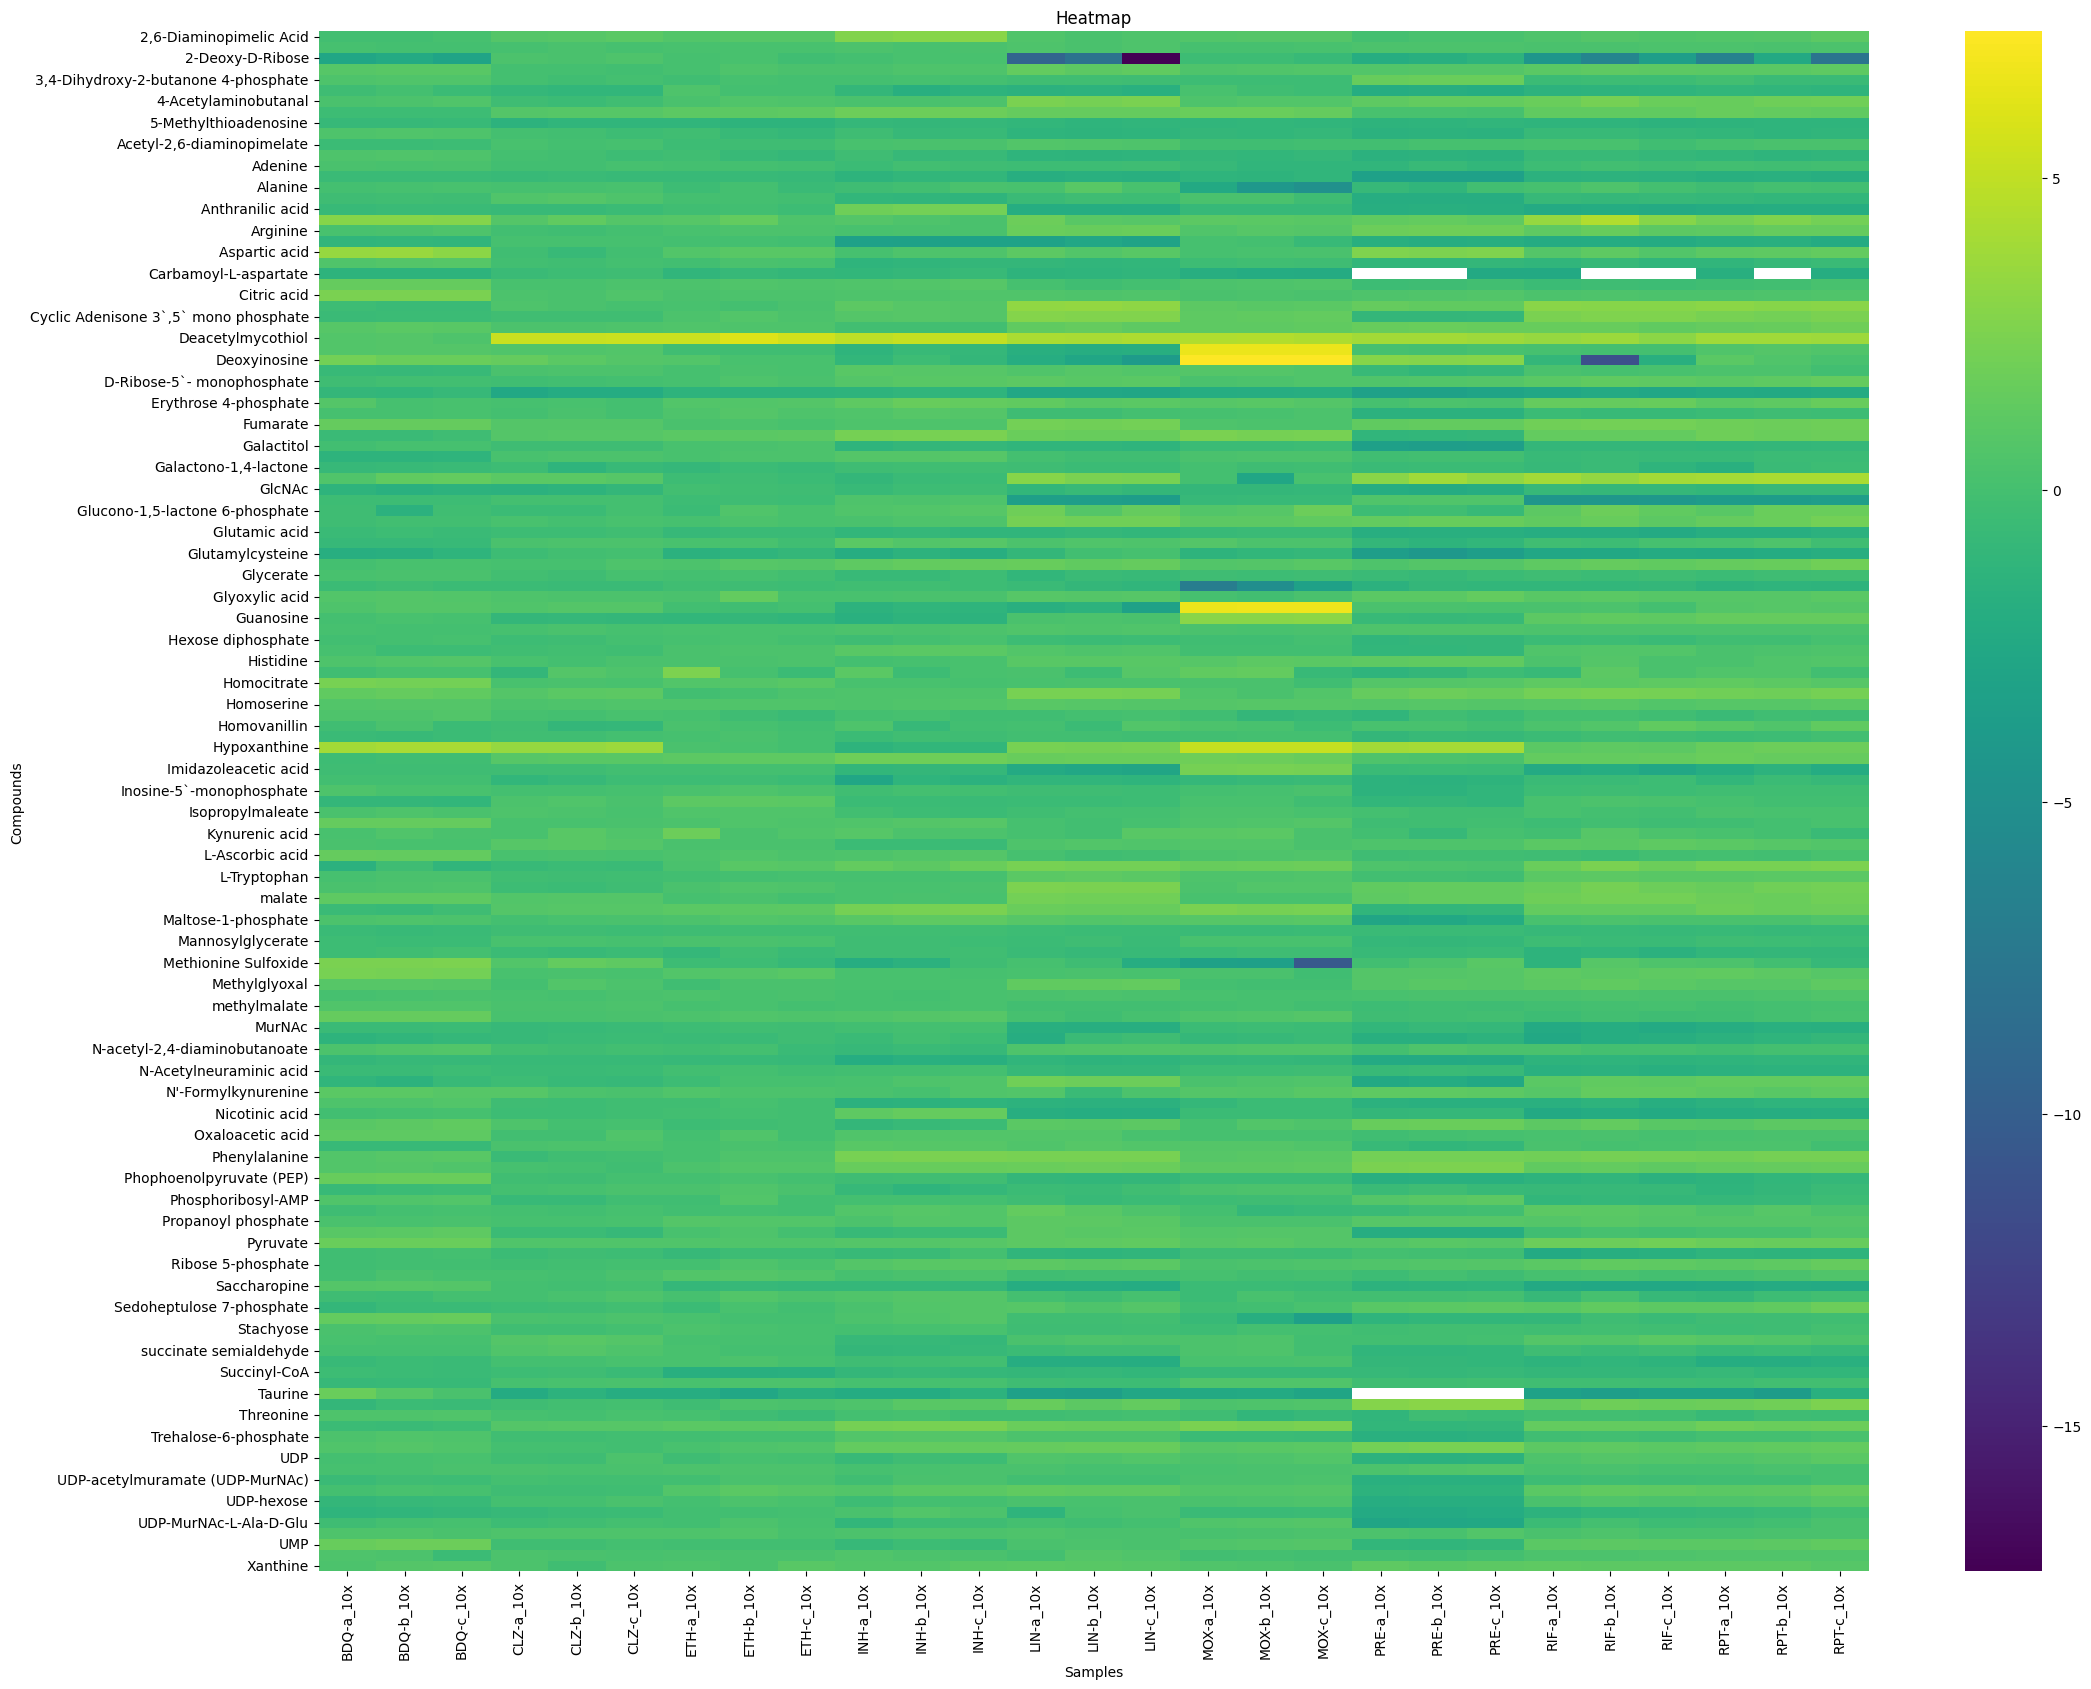

In [4]:
plt.figure(figsize=(25, 20))
sns.heatmap(data, cmap="viridis", cbar=True)
plt.title("Heatmap")
plt.xlabel("Samples")
plt.ylabel("Compounds")
plt.show()

In [5]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 930.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.3 MB/s eta 0:00:00


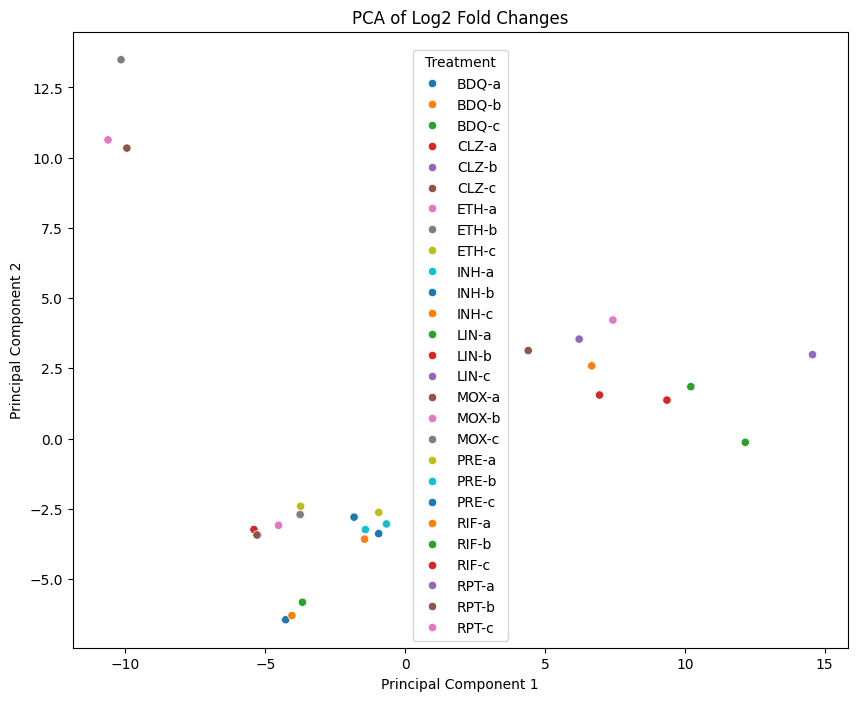

In [8]:
# Transpose
data_transposed = data.T
# Fill Na values with the mean of their respective columns
data_filled = data_transposed.fillna(data_transposed.mean())
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_filled)
# Create a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=data_filled.index)
# Plot the PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=[name.split('_')[0] for name in pca_df.index], palette='tab10')
plt.title('PCA of Log2 Fold Changes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Treatment')
plt.show()

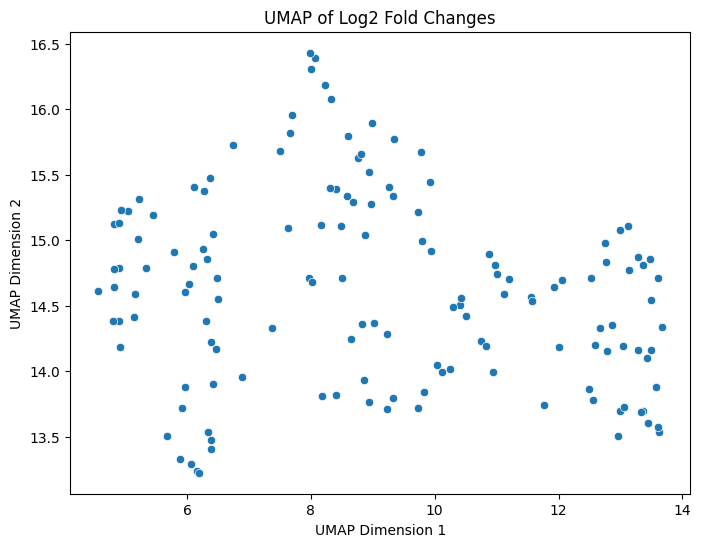

In [10]:
import umap
# Perform UMAP
reducer = umap.UMAP()
# Fill Na values with the mean of their respective columns
features_filled = np.nan_to_num(features)
umap_embedding = reducer.fit_transform(features_filled) # Pass the filled array to UMAP
# Create a DataFrame
umap_df = pd.DataFrame(data=umap_embedding, columns=['UMAP1', 'UMAP2'])
# Plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df)
plt.title('UMAP of Log2 Fold Changes')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
file_path = 'Bacterial data.xlsx'
data = pd.read_excel(file_path)
data.set_index('Compound Name', inplace=True)
data_transposed = data.T
data_filled = data_transposed.fillna(data_transposed.mean())

# Group by treatment
group_means = data.groupby(by=lambda x: x.split('_')[0], axis=1).mean()

# Print the group means
print("Group Means:")
print(group_means)

# Identify commonly changed features
threshold = 5
commonly_changed_features = group_means[(group_means.abs() > threshold).all(axis=1)]

# Print the commonly changed features
print("Commonly Changed Features:")
print(commonly_changed_features)

# Check if DataFrame is empty
if not commonly_changed_features.empty:
    # Plot heatmap of commonly changed features
    plt.figure(figsize=(15, 10))
    sns.heatmap(commonly_changed_features, cmap="viridis", cbar=True)
    plt.title("Heatmap of Commonly Changed Features")
    plt.xlabel("Treatment Groups")
    plt.ylabel("Compounds")
    plt.show()
else:
    print("No commonly changed features found that meet the threshold criteria.")

Group Means:
                                         BDQ-a     BDQ-b     BDQ-c     CLZ-a  \
Compound Name                                                                  
2,6-Diaminopimelic Acid              -0.148605 -0.115138  0.075507  0.696696   
2'-Deoxy-Cytidine                     0.061874 -0.047576 -0.014490  0.087159   
2-Deoxy-D-Ribose                     -2.690722 -2.359777 -2.934324  0.329372   
2-Deoxy-D-ribose 1-phosphate          0.873357  0.923773  0.917014 -0.059432   
3,4-Dihydroxy-2-butanone 4-phosphate  0.467216  0.561895  0.542785 -0.014719   
...                                        ...       ...       ...       ...   
UDP-MurNAc-L-Ala-D-Glu               -0.282370  0.005958  0.020124 -0.428867   
UDP-MurNAc-L-Ala-D-Glu-mesoA2pm       0.486070  0.474077  0.284907  0.452950   
UMP                                   1.650919  1.825727  1.781952 -0.217556   
Valine                                0.436198  0.326693 -0.500266  0.399049   
Xanthine                   

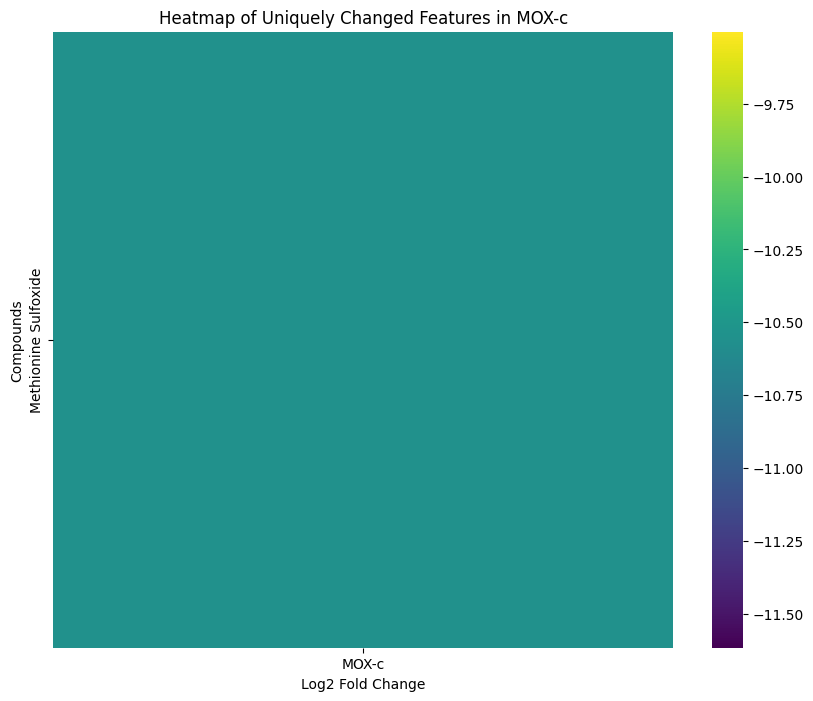

In [18]:
# Identify uniquely changing features
unique_features_dict = {}
for group in group_means.columns:
    other_groups = group_means.drop(columns=[group])
    unique_features = group_means[group][(group_means[group].abs() > threshold) & (other_groups.abs().max(axis=1) <= threshold)]
    unique_features_dict[group] = unique_features
# Plot heatmaps
for group, unique_features in unique_features_dict.items():
    if not unique_features.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(unique_features.to_frame(), cmap="viridis", cbar=True)
        plt.title(f"Heatmap of Uniquely Changed Features in {group}")
        plt.xlabel("Log2 Fold Change")
        plt.ylabel("Compounds")
        plt.show()